## Confidence Interval Sample

In [1]:
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
#seaborn^daki  data setlerinin isimleri
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
#tips data setini kullanalım 

tips = sns.load_dataset("tips")
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='day', ylabel='total_bill'>

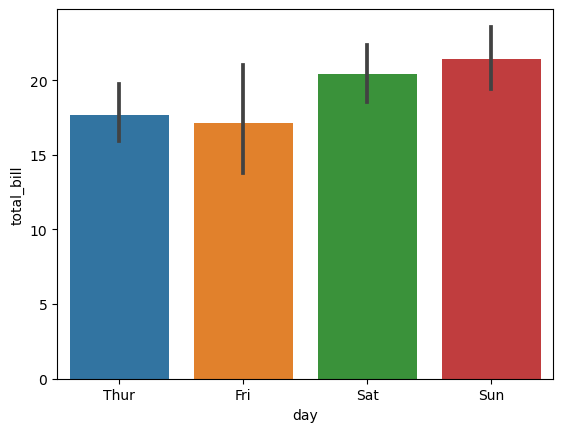

In [4]:
# barplot çizleim..  day ve total_bill için..  CI: confidence interval=95

sns.barplot(x = "day", y ="total_bill", data =tips, ci=95)

In [5]:
# sadece Sunday i dikkate alalım

tipsSun = tips[tips["day"] == "Sun"]
tipsSun.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
#sunday içi mean ve Std sapma bulalım

tipsSun["total_bill"].mean()

21.410000000000004

In [8]:
tipsSun["total_bill"].std()

8.832121828869889

In [9]:
#standard error of the mean hesaplayalım..standart hata...(SE)
# n= sample size
# SE = sigma/sqrt(n)

sem = tipsSun["total_bill"].std() / np.sqrt(len(tipsSun))
sem

1.0131138555021968

In [10]:
#margin of Error hesabı..   MOE...  
# %95 için yapalım

z = stats.norm.ppf(0.975)
z

1.959963984540054

In [11]:
moe = z * sem
moe

1.9856666690228222

In [12]:
# CI ust limit degeri

tipsSun["total_bill"].mean() + moe

23.395666669022827

In [14]:
# CI alt limit degeri

tipsSun["total_bill"].mean() - moe

19.42433333097718

In [15]:
# scipy kutuphanesinden de yukardaki alt-ust limit degerleri bulunabilir

stats.norm.interval(0.95, loc = tipsSun["total_bill"].mean(), scale = sem)

(19.42433333097718, 23.395666669022827)